In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import re
from scipy.stats import chi2_contingency
import seaborn as sns
from scipy.stats import chi2

In [ ]:
data_ply = pd.read_excel("/content/gdrive/Shareddrives/BU Spark! CS506 - CPCS Team/DAMION Database Data/Plymouth/DAMION Data from Plymouth County (Adult Cases only).xlsx")

In [ ]:
data_ply.columns

Index(['Case ID Number', 'Def. ID Number', 'Race', 'Sex', 'Offense Date',
       'Filing Date', 'Received Date', 'Court Location Description', 'Count',
       'Filed Charge Code', 'Filed Charge Description', 'Filed Charge Type',
       'Charge Type Description', 'Filed Charge Category',
       'Officer Agency Description', 'Disp. Date', 'Disp. Code',
       'Disposition Description', 'Disp. Judge Name', 'Sentence Type',
       'Sentence Type Description', 'Case Status Description'],
      dtype='object')

In [ ]:
def chi_square_test(df, col1, col2):
    """
    run chi-square test of independence
    """
    # create contingency table
    contingency_table = pd.crosstab(df[col1], df[col2])
    # run chi-square test
    stat, p, dof, expected = chi2_contingency(contingency_table)
    # print results
    print('Chi-square test of independence')
    print('Chi-square value: {}'.format(stat))
    print('p-value: {}'.format(p))
    print('Degrees of freedom: {}'.format(dof))
    print('Expected values:')
    print(expected,"\n\n\n")
    # visualize the results
    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title('Chi-Square Test of Independence - contingency_table')
    ax.set_xlabel(col2)
    ax.set_ylabel(col1)
    plt.show()

    print("\n\n\n")
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

    print("\n\n\n")
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

Chi-square test of independence
Chi-square value: 15258.615043800524
p-value: 0.0
Degrees of freedom: 198
Expected values:
[[2.31821632e+01 2.10381954e+02 4.95391390e-02 1.98673486e+01
  6.44439582e+00 1.05158669e+02 1.09847656e-01 1.13746171e+01
  1.68002297e-01 2.31757015e+00 7.75395219e-02 1.06082681e+02
  3.01844128e+01 2.47695695e-01 2.15387561e-03 2.86250068e+00
  1.29232537e-02 4.89812852e+01 6.24947008e+01]
 [2.16418372e+03 1.96403242e+04 4.62475384e+00 1.85472737e+03
  6.01620152e+02 9.81714595e+03 1.02548890e+01 1.06188370e+03
  1.56839478e+01 2.16358049e+02 7.23874515e+00 9.90340766e+03
  2.81788262e+03 2.31237692e+01 2.01076254e-01 2.67230342e+02
  1.20645752e+00 4.57267509e+03 5.83422751e+03]
 [8.83497997e+01 8.01789002e+02 1.88799163e-01 7.57166730e+01
  2.45603085e+01 4.00771371e+02 4.18641622e-01 4.33499296e+01
  6.40275423e-01 8.83251737e+00 2.95511733e-01 4.04292886e+02
  1.15036151e+02 9.43995815e-01 8.20865926e-03 1.09093082e+01
  4.92519556e-02 1.86673120e+02 2.381

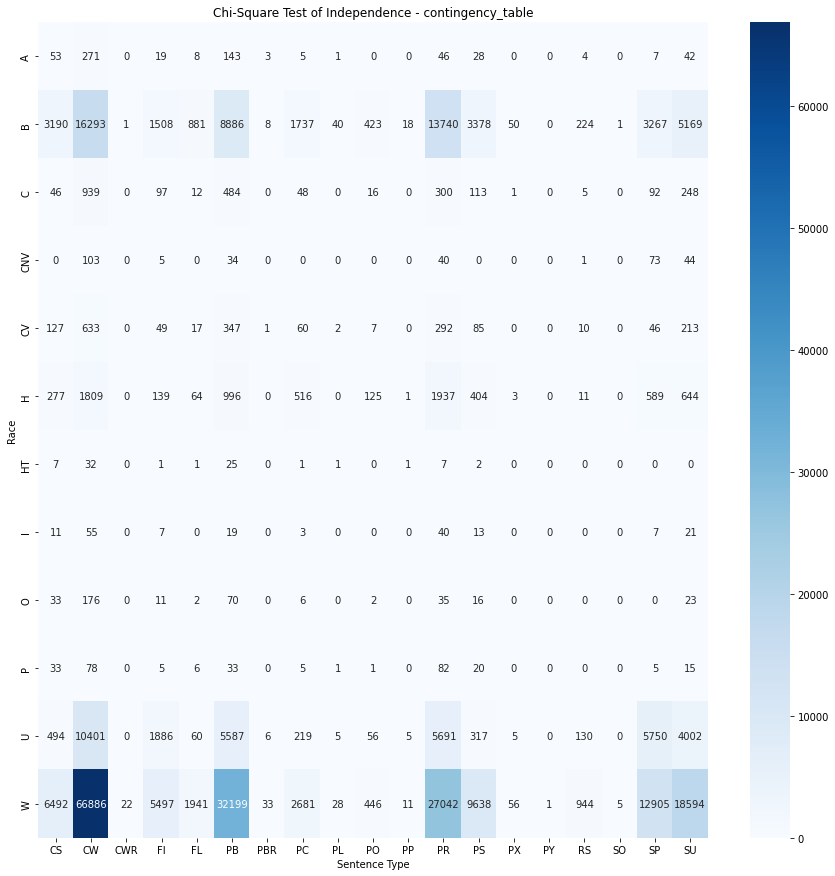





probability=0.950, critical=231.829, stat=15258.615
Dependent (reject H0)




significance=0.050, p=0.000
Dependent (reject H0)


In [ ]:
chi_square_test(data_ply, 'Race', 'Sentence Type')

Chi-square test of independence
Chi-square value: 275611.3585493843
p-value: 0.0
Degrees of freedom: 26114
Expected values:
[[5.12778877e-03 2.05111551e-02 7.69168315e-03 ... 2.56389438e-03
  2.56389438e-03 2.56389438e-03]
 [4.77622187e-01 1.91048875e+00 7.16433281e-01 ... 2.38811094e-01
  2.38811094e-01 2.38811094e-01]
 [1.52836593e-02 6.11346372e-02 2.29254890e-02 ... 7.64182965e-03
  7.64182965e-03 7.64182965e-03]
 ...
 [2.01693025e-03 8.06772100e-03 3.02539537e-03 ... 1.00846512e-03
  1.00846512e-03 1.00846512e-03]
 [2.04459182e-01 8.17836728e-01 3.06688773e-01 ... 1.02229591e-01
  1.02229591e-01 1.02229591e-01]
 [1.21717467e+00 4.86869870e+00 1.82576201e+00 ... 6.08587337e-01
  6.08587337e-01 6.08587337e-01]] 





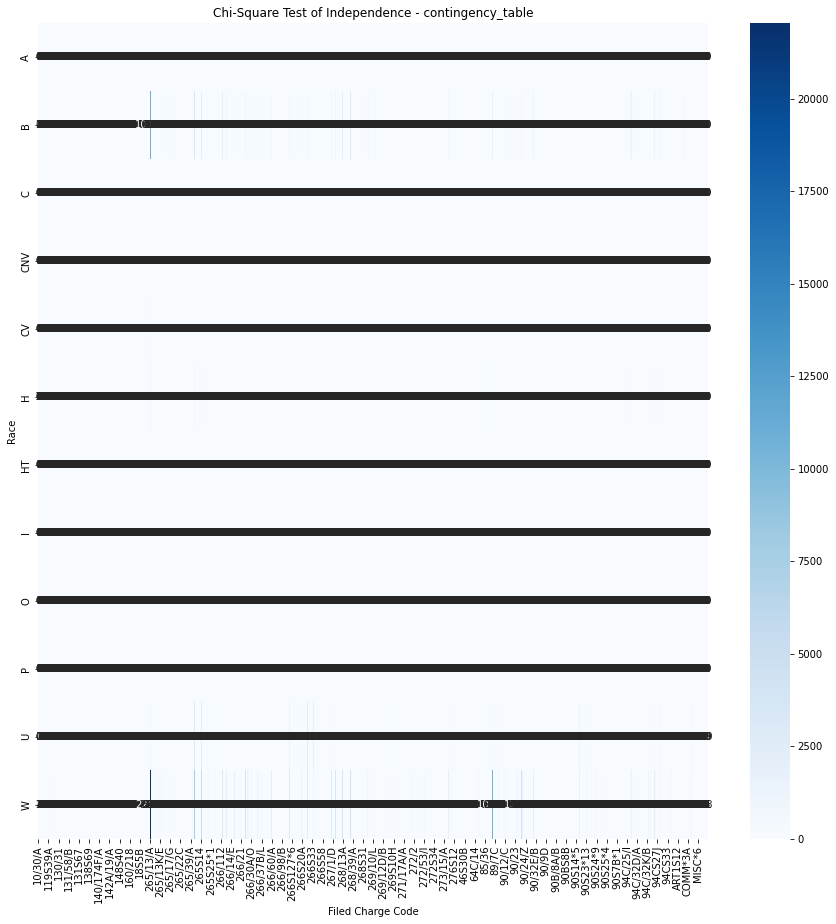





probability=0.950, critical=26491.039, stat=275611.359
Dependent (reject H0)




significance=0.050, p=0.000
Dependent (reject H0)


In [ ]:
chi_square_test(data_ply, 'Race', 'Filed Charge Code')

In [ ]:
data_ply_drpna = data_ply[['Race', 'Filed Charge Code', 'Sentence Type']].dropna()

In [ ]:
data_ply_94C = data_ply_drpna[data_ply_drpna['Filed Charge Code'].str.contains("94C")]
data_ply_94C

,Race,Filed Charge Code,Sentence Type
125,W,94CS37,PR
290,W,94CS34*PD,SP
610,U,94CS34*PD,CW
907,U,94CS34*PB,PB
908,U,94CS34*PD,PB
...,...,...,...
730837,W,94C/32C/C,CW
730838,W,94C/34/G,CW
730839,W,94C/34/E,CW
730840,W,94C/32C/C,CW


Chi-square test of independence
Chi-square value: 17038.517729951236
p-value: 0.0
Degrees of freedom: 1606
Expected values:
[[7.60315253e-03 2.53438418e-03 7.60315253e-03 ... 9.12378303e-02
  2.53438418e-03 1.59666203e+00]
 [7.76448771e-01 2.58816257e-01 7.76448771e-01 ... 9.31738526e+00
  2.58816257e-01 1.63054242e+02]
 [2.03059805e-02 6.76866018e-03 2.03059805e-02 ... 2.43671766e-01
  6.76866018e-03 4.26425591e+00]
 ...
 [5.65600371e-03 1.88533457e-03 5.65600371e-03 ... 6.78720445e-02
  1.88533457e-03 1.18776078e+00]
 [3.12192860e-01 1.04064287e-01 3.12192860e-01 ... 3.74631433e+00
  1.04064287e-01 6.55605007e+01]
 [1.66101066e+00 5.53670221e-01 1.66101066e+00 ... 1.99321280e+01
  5.53670221e-01 3.48812239e+02]] 





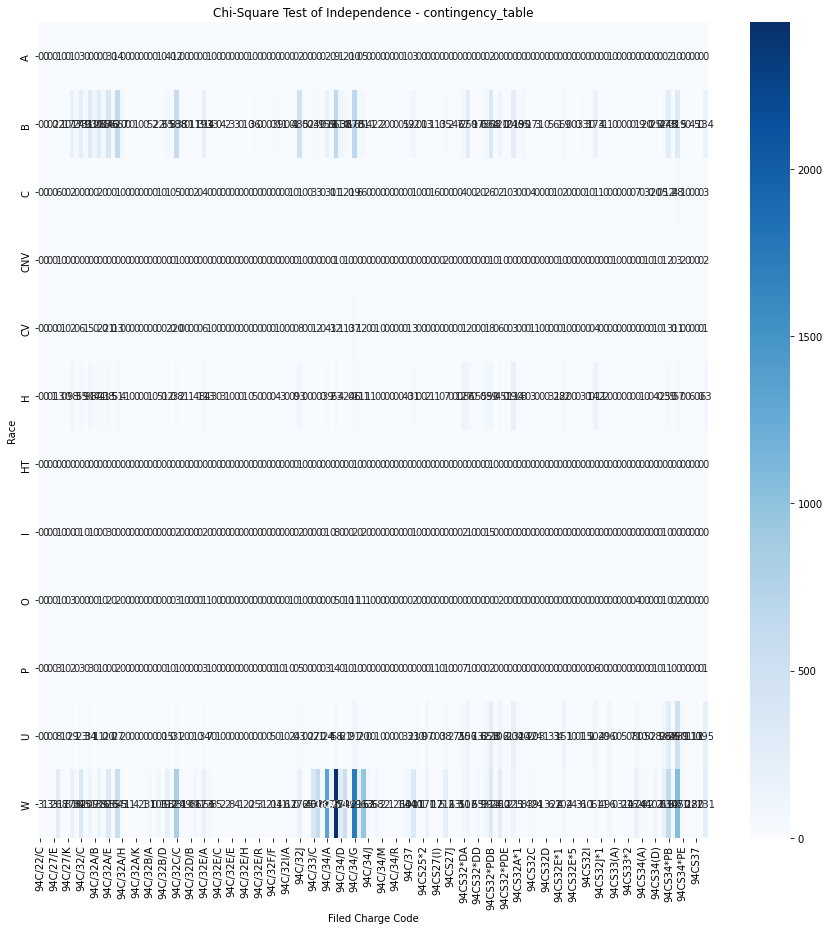





probability=0.950, critical=1700.344, stat=17038.518
Dependent (reject H0)




significance=0.050, p=0.000
Dependent (reject H0)


In [ ]:
chi_square_test(data_ply_94C, 'Race', 'Filed Charge Code')

Chi-square test of independence
Chi-square value: 1350.008653234475
p-value: 2.2169592701648022e-80
Degrees of freedom: 495
Expected values:
[[3.56347439e-01 1.25909428e+00 3.58723088e+00 2.49443207e-01
  1.00965108e-01 5.93912398e-03 5.93912398e-03 5.93912398e-03
  8.31477357e-01 3.56347439e-02 2.01930215e-01 7.40014848e+00
  1.78173719e-02 2.13808463e-01 2.96956199e-02 7.12694878e-02
  3.24870082e+00 5.93912398e-03 5.34521158e-02 5.93912398e-03
  4.15738679e-02 5.34521158e-02 5.93912398e-03 9.14625093e-01
  2.96956199e-02 2.37564959e-02 1.18782480e-02 1.18782480e-02
  3.56347439e-02 8.31477357e-02 3.50408315e-01 2.73199703e-01
  3.02895323e-01 3.02895323e-01 5.93912398e-03 5.93912398e-03
  2.37564959e-02 7.12694878e-02 3.62286563e-01 6.53303638e-02
  1.78173719e-02 2.79138827e-01 1.18782480e-02 8.90868597e-02
  5.93912398e-03 5.93912398e-03 5.93912398e-03 3.80103935e-01
  2.43504083e-01 6.05790646e-01 1.06904232e-01 5.93912398e-02
  1.19970304e+00 1.00965108e-01 2.07869339e-01 1.7817

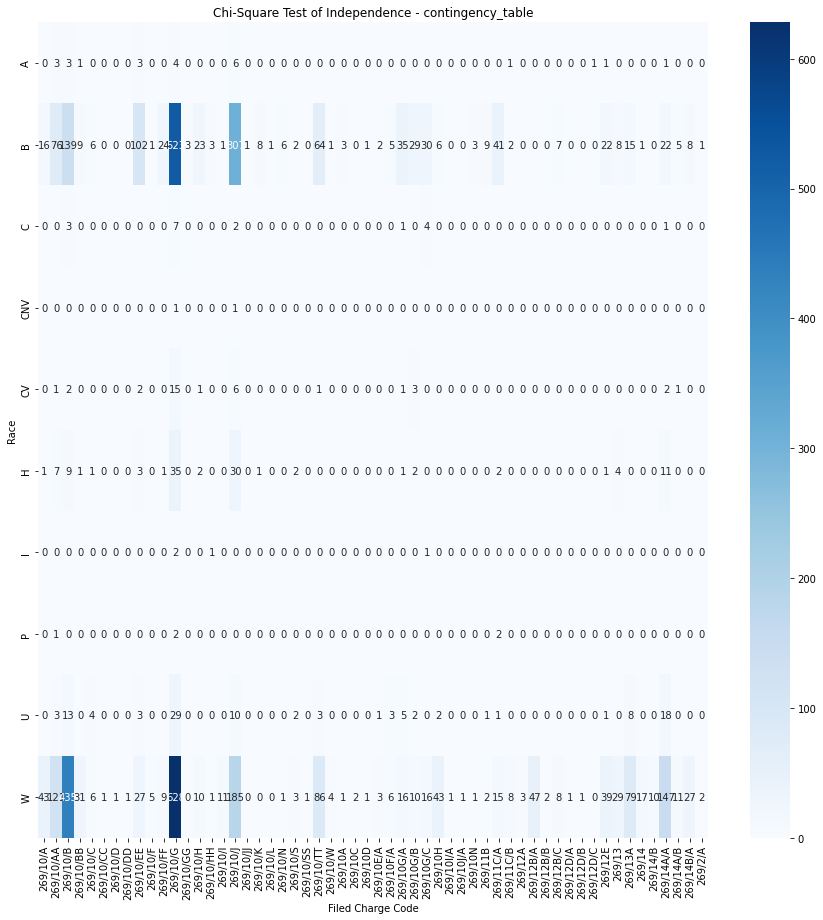





probability=0.950, critical=547.866, stat=1350.009
Dependent (reject H0)




significance=0.050, p=0.000
Dependent (reject H0)


In [ ]:
#chi-square for charge 269
data_ply_269 = data_ply_drpna[data_ply_drpna['Filed Charge Code'].str.contains("269/")]
chi_square_test(data_ply_269, 'Race', 'Filed Charge Code')

Chi-square test of independence
Chi-square value: 5522.87974742744
p-value: 0.0
Degrees of freedom: 165
Expected values:
[[2.47355896e+00 3.01084840e+01 5.06876835e-03 9.93478597e-01
  2.78782259e-01 1.00691083e+01 1.01375367e-02 2.87399166e+00
  1.30013908e+00 2.01584917e+01 3.56334415e+00 3.54813785e-02
  1.52063051e-02 2.53438418e-03 2.78782259e+00 7.32437027e+00]
 [2.52604667e+02 3.07473713e+03 5.17632514e-01 1.01455973e+02
  2.84697883e+01 1.02827699e+03 1.03526503e+00 2.93497636e+02
  1.32772740e+02 2.05862451e+03 3.63895658e+02 3.62342760e+00
  1.55289754e+00 2.58816257e-01 2.84697883e+02 7.47978983e+02]
 [6.60621233e+00 8.04116829e+01 1.35373204e-02 2.65331479e+00
  7.44552619e-01 2.68918869e+01 2.70746407e-02 7.67566064e+00
  3.47232267e+00 5.38379230e+01 9.51673621e+00 9.47612425e-02
  4.06119611e-02 6.76866018e-03 7.44552619e+00 1.95614279e+01]
 [6.93803122e-01 8.44506259e+00 1.42172771e-03 2.78658631e-01
  7.81950240e-02 2.82426209e+00 2.84345542e-03 8.06119611e-01
  3.6467

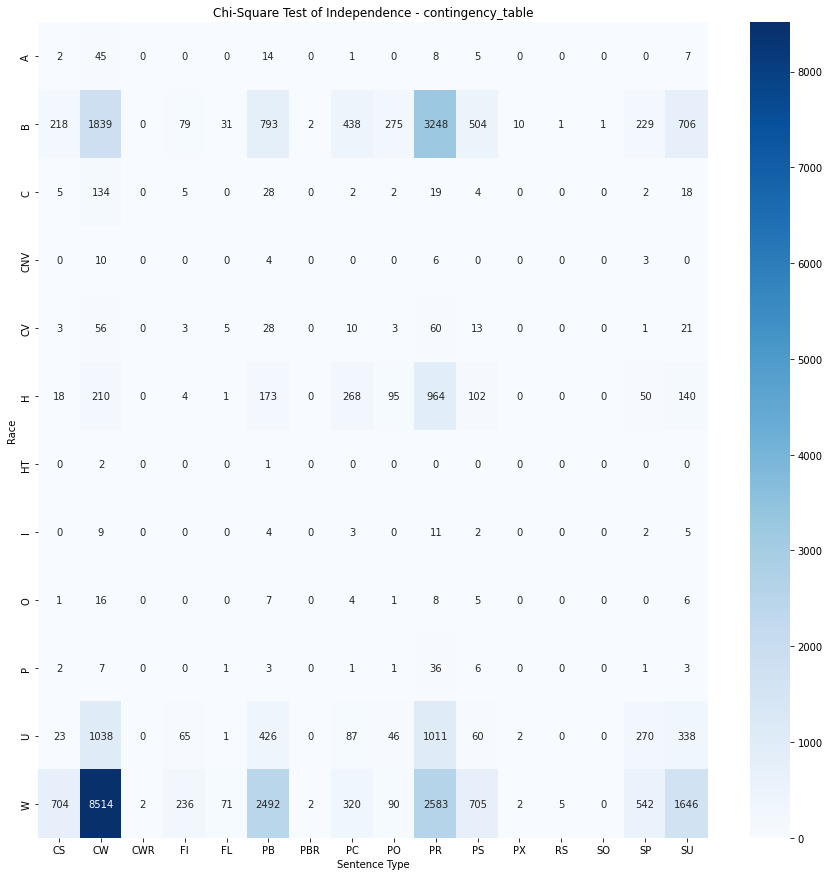





probability=0.950, critical=195.973, stat=5522.880
Dependent (reject H0)




significance=0.050, p=0.000
Dependent (reject H0)


In [ ]:
chi_square_test(data_ply_94C, 'Race', 'Sentence Type')

Chi-square test of independence
Chi-square value: 785.1665572259822
p-value: 1.7153920091862905e-99
Degrees of freedom: 117
Expected values:
[[3.74164811e-01 5.86191537e+00 5.93912398e-03 1.95991091e-01
  1.54417223e-01 3.62880475e+00 5.93912398e-03 1.95991091e+00
  2.91017075e-01 8.86117298e+00 1.47290275e+00 6.53303638e-02
  1.78173719e-02 1.10467706e+00]
 [2.44922049e+01 3.83711210e+02 3.88765157e-01 1.28292502e+01
  1.01078941e+01 2.37535511e+02 3.88765157e-01 1.28292502e+02
  1.90494927e+01 5.80037614e+02 9.64137590e+01 4.27641673e+00
  1.16629547e+00 7.23103192e+01]
 [2.80623608e-01 4.39643653e+00 4.45434298e-03 1.46993318e-01
  1.15812918e-01 2.72160356e+00 4.45434298e-03 1.46993318e+00
  2.18262806e-01 6.64587973e+00 1.10467706e+00 4.89977728e-02
  1.33630290e-02 8.28507795e-01]
 [3.11804009e-02 4.88492947e-01 4.94926998e-04 1.63325909e-02
  1.28681020e-02 3.02400396e-01 4.94926998e-04 1.63325909e-01
  2.42514229e-02 7.38431081e-01 1.22741896e-01 5.44419698e-03
  1.48478099e-03

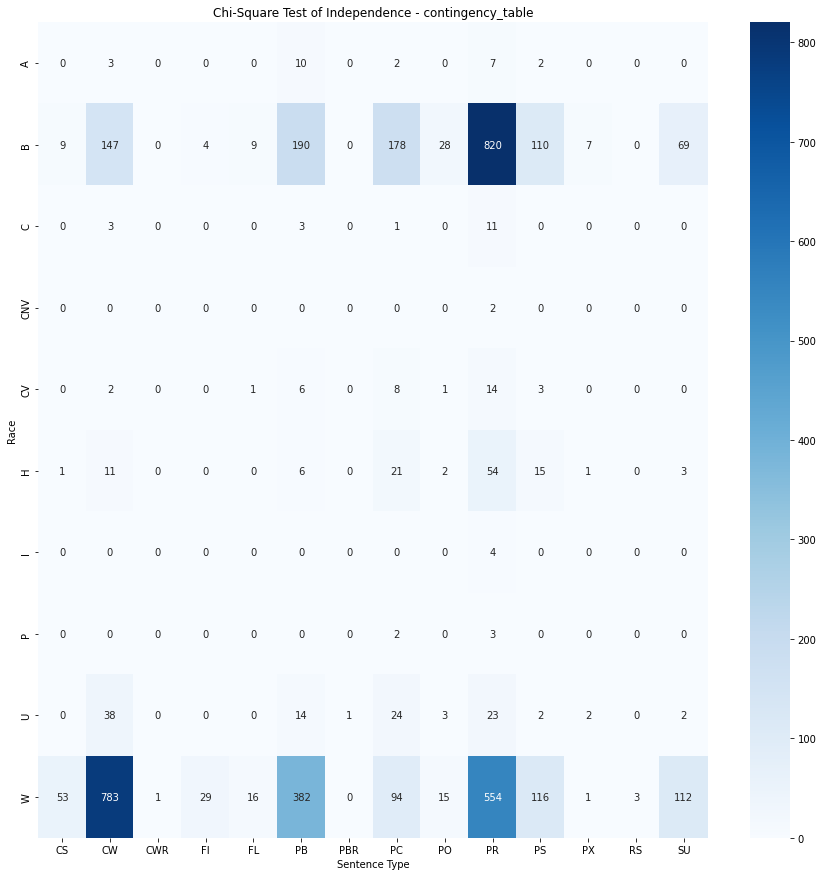





probability=0.950, critical=143.246, stat=785.167
Dependent (reject H0)




significance=0.050, p=0.000
Dependent (reject H0)


In [ ]:
chi_square_test(data_ply_269, 'Race', 'Sentence Type')